Predicting reaction performance in C–N cross-coupling using machine learning
Experimental data obtained from Ahneman et al publication in Science DOI: 10.1126/science.aar5169
                    

In [1]:
# Import relevant libraries
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import utils
%matplotlib inline

In [2]:
# open a file containing descriptors and yield
data = pd.read_csv("Descriptor_and_yield_table.csv")
X_data = data.drop(['yield'], axis =1) # the 120 descriptors and their values
y_data = data['yield'] # Yield of the 3560 rows is stored in the y_data variable

In [3]:
data

,additive_*C3_NMR_shift,additive_*C3_electrostatic_charge,additive_*C4_NMR_shift,additive_*C4_electrostatic_charge,additive_*C5_NMR_shift,additive_*C5_electrostatic_charge,additive_*N1_electrostatic_charge,additive_*O1_electrostatic_charge,additive_E_HOMO,additive_E_LUMO,...,ligand_V6_frequency,ligand_V6_intensity,ligand_V7_frequency,ligand_V7_intensity,ligand_V8_frequency,ligand_V8_intensity,ligand_V9_frequency,ligand_V9_intensity,ligand_dipole_moment,yield
0,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,10.657812
1,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,14.747896
2,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,18.278686
3,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,2.475058
4,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,6.119058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,57.426670
3956,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,86.233157
3957,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,1.440081
3958,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,43.538365


<AxesSubplot:>

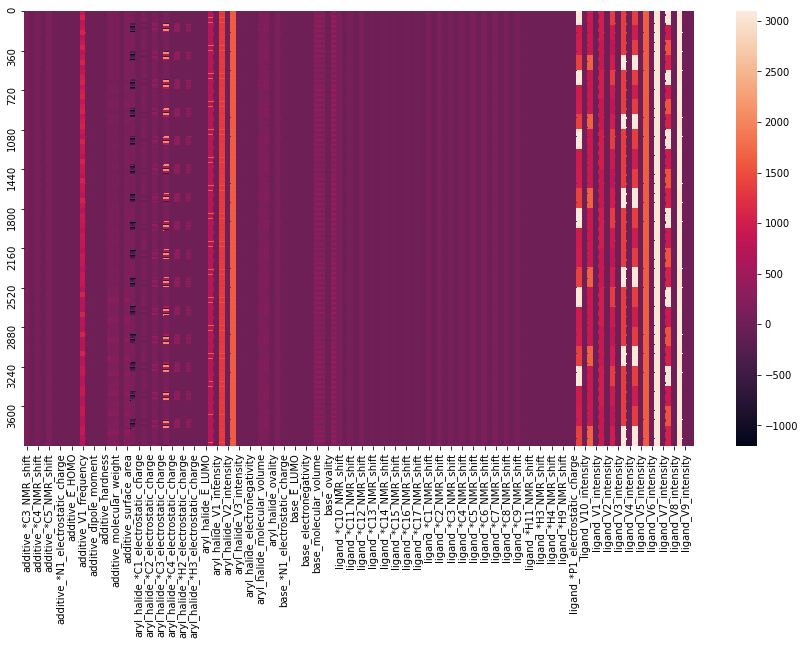

In [4]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))
# Generate heatmap for the seven columns or descriptors
sn.heatmap(data=X_data,yticklabels=360)

In [5]:
# Predict plate 3  using plate 1 and plate 2
X_train, X_test, y_train, y_test = X_data[:2520],X_data[2520:], y_data[:2520], y_data[2520:]
rf = RandomForestRegressor(n_estimators=500, random_state=42)

In [6]:
# Data preprocessing
# scale train set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# scale test set
X_test = scaler.transform(X_test)

In [7]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
# Model Training and prediction
rf.fit(X_train,y_train) # training using plate 1 and plate 2
predicted_yield =rf.predict(X_test) # predicting yield for plate 3

In [9]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_test, predicted_yield )) 
print('rmse:', rmse)

rmse: 11.311811228194705


In [10]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_test , predicted_yield )
print('R^2:', R2)

R^2: 0.8080592165141831


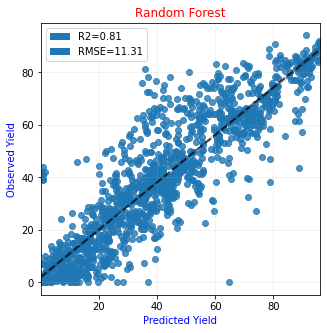

In [11]:
fig = plt.figure(figsize=(5,5))
sn.regplot(x=predicted_yield , y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Random Forest", color='red')
plt.grid(alpha=0.2)
R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
rmse = mpatches.Patch(label="RMSE={:04.2f}".format(rmse))
plt.legend(handles=[R2, rmse])

In [12]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, random_state=42)

In [13]:
# Model Training and prediction
xgb.fit(X_train,y_train) # training using plate 1 and plate 2
predicted_yield2 = xgb.predict(X_test) # predicting yield for plate 3

In [14]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_test, predicted_yield2))  
print('rmse:', rmse2)

rmse: 13.036753135841147


In [15]:
# R^2 (coefficient of determination) regression score function: 
R_2 =r2_score(y_test, predicted_yield2)
print('R^2:', R_2)

R^2: 0.7450577297715619


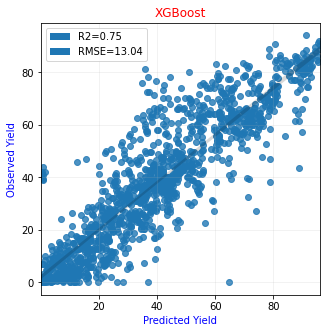

In [16]:
fig = plt.figure(figsize=(5,5))
sn.regplot(x=predicted_yield , y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("XGBoost", color='red')
plt.grid(alpha=0.2)
R_2 = mpatches.Patch(label="R2={:04.2f}".format(R_2))
rmse2 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse2))
plt.legend(handles=[R_2, rmse2])